# ATE Analysis: Survival Proportion Based on Ticket Fare

This notebook performs an Average Treatment Effect (ATE) analysis to compare the proportion of survived passengers based on their ticket fare (high fare vs low fare).

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics for Fare:")
print(df['Fare'].describe())

Dataset shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

In [4]:
# Clean the data - remove rows with missing Fare or Survived values
df_clean = df[['Survived', 'Fare']].dropna()

print(f"Original dataset: {len(df)} rows")
print(f"Clean dataset: {len(df_clean)} rows")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original dataset: 891 rows
Clean dataset: 891 rows
Rows removed: 0


## Define Treatment and Control Groups

We'll split passengers into two groups based on the median fare:
- **Treatment Group (High Fare)**: Passengers who paid above the median fare
- **Control Group (Low Fare)**: Passengers who paid below or equal to the median fare

In [5]:
# Calculate median fare as the threshold
median_fare = df_clean['Fare'].median()
print(f"Median Fare: ${median_fare:.2f}")

# Create treatment indicator: 1 if fare > median, 0 otherwise
df_clean['Treatment'] = (df_clean['Fare'] > median_fare).astype(int)

# Separate into treatment and control groups
control_group = df_clean[df_clean['Treatment'] == 0]
treatment_group = df_clean[df_clean['Treatment'] == 1]

print(f"\nControl Group (Low Fare ≤ ${median_fare:.2f}): {len(control_group)} passengers")
print(f"Treatment Group (High Fare > ${median_fare:.2f}): {len(treatment_group)} passengers")

Median Fare: $14.45

Control Group (Low Fare ≤ $14.45): 447 passengers
Treatment Group (High Fare > $14.45): 444 passengers


## Calculate Survival Proportions and ATE

In [6]:
# Calculate survival proportions for each group
survival_control = control_group['Survived'].mean()
survival_treatment = treatment_group['Survived'].mean()

# Calculate Average Treatment Effect (ATE)
ATE = survival_treatment - survival_control

print("="*60)
print("SURVIVAL PROPORTIONS")
print("="*60)
print(f"Control Group (Low Fare):     {survival_control:.4f} ({survival_control*100:.2f}%)")
print(f"Treatment Group (High Fare):  {survival_treatment:.4f} ({survival_treatment*100:.2f}%)")
print("="*60)
print(f"AVERAGE TREATMENT EFFECT (ATE): {ATE:.4f} ({ATE*100:.2f} percentage points)")
print("="*60)

if ATE > 0:
    print(f"\nInterpretation: Passengers who paid high fares had a {ATE*100:.2f} percentage point")
    print(f"HIGHER survival rate compared to those who paid low fares.")
else:
    print(f"\nInterpretation: Passengers who paid high fares had a {abs(ATE)*100:.2f} percentage point")
    print(f"LOWER survival rate compared to those who paid low fares.")

SURVIVAL PROPORTIONS
Control Group (Low Fare):     0.2506 (25.06%)
Treatment Group (High Fare):  0.5180 (51.80%)
AVERAGE TREATMENT EFFECT (ATE): 0.2675 (26.75 percentage points)

Interpretation: Passengers who paid high fares had a 26.75 percentage point
HIGHER survival rate compared to those who paid low fares.


## Visualization of Results

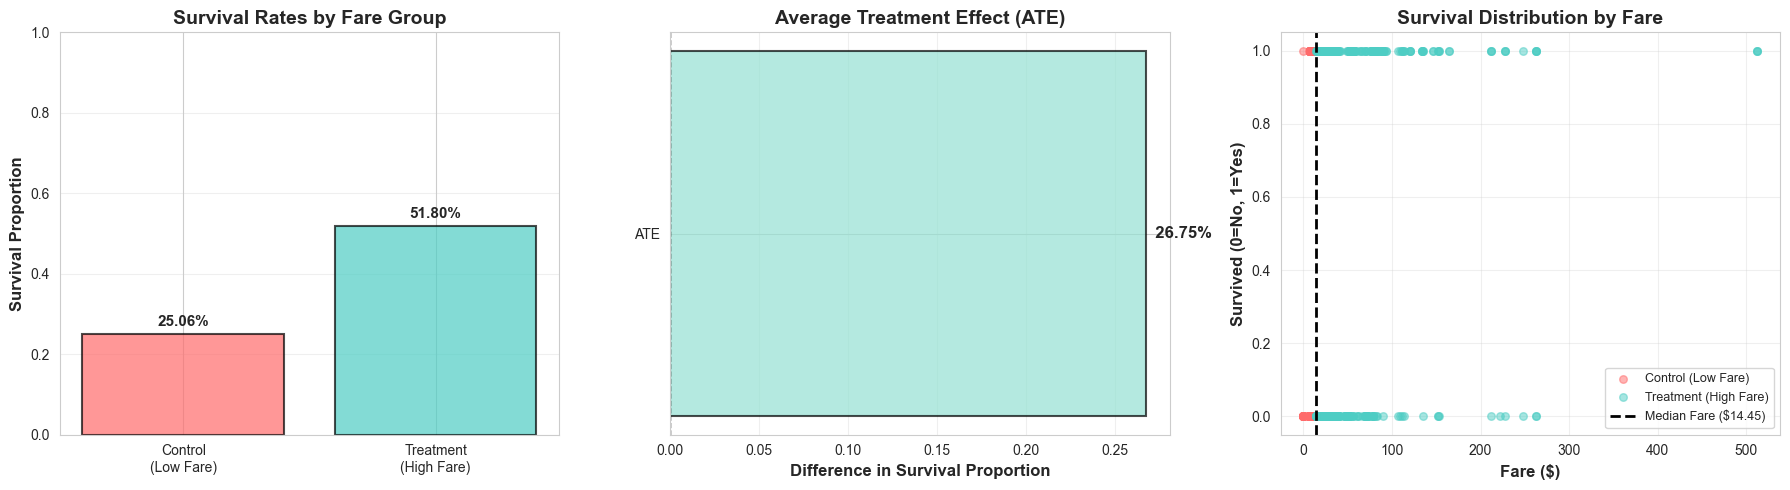

In [7]:
# Create a comprehensive visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Bar chart comparing survival proportions
groups = ['Control\n(Low Fare)', 'Treatment\n(High Fare)']
survival_rates = [survival_control, survival_treatment]
colors = ['#FF6B6B', '#4ECDC4']

axes[0].bar(groups, survival_rates, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Survival Proportion', fontsize=12, fontweight='bold')
axes[0].set_title('Survival Rates by Fare Group', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (group, rate) in enumerate(zip(groups, survival_rates)):
    axes[0].text(i, rate + 0.02, f'{rate:.2%}', ha='center', fontsize=11, fontweight='bold')

# Plot 2: ATE visualization
axes[1].barh(['ATE'], [ATE], color='#95E1D3', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Difference in Survival Proportion', fontsize=12, fontweight='bold')
axes[1].set_title('Average Treatment Effect (ATE)', fontsize=14, fontweight='bold')
axes[1].text(ATE, 0, f'  {ATE:.2%}', va='center', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Plot 3: Distribution of survival by fare
axes[2].scatter(control_group['Fare'], control_group['Survived'], 
               alpha=0.5, c='#FF6B6B', label='Control (Low Fare)', s=30)
axes[2].scatter(treatment_group['Fare'], treatment_group['Survived'], 
               alpha=0.5, c='#4ECDC4', label='Treatment (High Fare)', s=30)
axes[2].axvline(x=median_fare, color='black', linestyle='--', linewidth=2, label=f'Median Fare (${median_fare:.2f})')
axes[2].set_xlabel('Fare ($)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Survived (0=No, 1=Yes)', fontsize=12, fontweight='bold')
axes[2].set_title('Survival Distribution by Fare', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=9)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

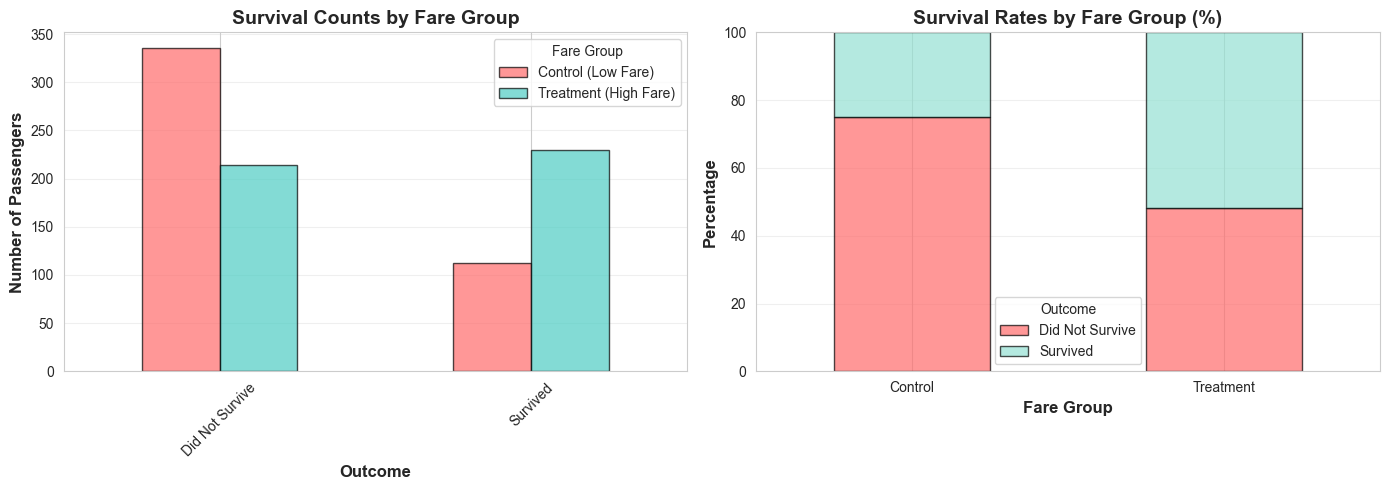

In [8]:
# Additional visualization: Grouped bar chart with counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Count of survivors and non-survivors by group
survival_counts = pd.DataFrame({
    'Control': [
        len(control_group[control_group['Survived'] == 0]),
        len(control_group[control_group['Survived'] == 1])
    ],
    'Treatment': [
        len(treatment_group[treatment_group['Survived'] == 0]),
        len(treatment_group[treatment_group['Survived'] == 1])
    ]
}, index=['Did Not Survive', 'Survived'])

survival_counts.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='black')
axes[0].set_title('Survival Counts by Fare Group', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Passengers', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Outcome', fontsize=12, fontweight='bold')
axes[0].legend(title='Fare Group', labels=['Control (Low Fare)', 'Treatment (High Fare)'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Stacked percentage bar chart
survival_pct = survival_counts.div(survival_counts.sum(axis=0), axis=1) * 100
survival_pct.T.plot(kind='bar', stacked=True, ax=axes[1], 
                    color=['#FF6B6B', '#95E1D3'], alpha=0.7, edgecolor='black')
axes[1].set_title('Survival Rates by Fare Group (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fare Group', fontsize=12, fontweight='bold')
axes[1].legend(title='Outcome', labels=['Did Not Survive', 'Survived'])
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Summary Statistics

In [9]:
# Create a summary table
summary_data = {
    'Group': ['Control (Low Fare)', 'Treatment (High Fare)', 'Difference (ATE)'],
    'N': [len(control_group), len(treatment_group), ''],
    'Survived': [
        control_group['Survived'].sum(),
        treatment_group['Survived'].sum(),
        ''
    ],
    'Did Not Survive': [
        len(control_group) - control_group['Survived'].sum(),
        len(treatment_group) - treatment_group['Survived'].sum(),
        ''
    ],
    'Survival Rate': [
        f'{survival_control:.2%}',
        f'{survival_treatment:.2%}',
        f'{ATE:+.2%}'
    ],
    'Avg Fare': [
        f'${control_group["Fare"].mean():.2f}',
        f'${treatment_group["Fare"].mean():.2f}',
        ''
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)


SUMMARY TABLE
                Group   N Survived Did Not Survive Survival Rate Avg Fare
   Control (Low Fare) 447      112             335        25.06%    $8.71
Treatment (High Fare) 444      230             214        51.80%   $55.85
     Difference (ATE)                                    +26.75%         
